In [ ]:
options(max.print = 100)
filtered_erna_path = "Analysis/10X_PBMC/05_erna_preprocess/filtered_erna_pbmc_granulocyte_sorted_10k.rds"
cell_type_enhancers_path = "Analysis/10X_PBMC/cell_type_enhancers/PBMC_enhancers_id.tsv"
cell_idents_path = "Analysis/10X_PBMC/gex_clustering/PBMC_RNA_idents.RDS"
enhancers_metadata_path = "Analysis/enhancers/tcea_FANTOM/tcea_FANTOM_enhancers_metadata.txt"


In [3]:
setwd(here::here()) # set working directory to project root
getwd() 

[1] "/sci/labs/yotamd/lab_share/avishai.wizel/Projects/eRNA"

In [4]:
library(dplyr)
library(Matrix)
library(Seurat)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Attaching SeuratObject
‘SeuratObject’ was built under R 4.3.1 but the current version is 4.3.3; it is
recomended that you reinstall ‘SeuratObject’ as the ABI for R may have changed


In [5]:
rna_enhancers = readRDS(filtered_erna_path)

In [6]:
rna_enhancers[1:10,1:10]

10 x 10 sparse Matrix of class "dgCMatrix"
  [[ suppressing 10 column names ‘AAACAGCCAATCCCTT’, ‘AAACAGCCAATGCGCT’, ‘AAACAGCCACACTAAT’ ... ]]
                                                         
FANTOM5_10:101475394-101475766 . . .   .      . . . . . .
FANTOM5_10:101754114-101754425 . . .   .      . . . . . .
FANTOM5_10:101942179-101942274 . . .   .      . . . . . .
FANTOM5_10:102140082-102140467 . . .   .      . . . . . .
FANTOM5_10:102284617-102284981 . . .   .      . . . . . .
FANTOM5_10:102284995-102285353 . . . 184.7404 . . . . . .
FANTOM5_10:103238536-103238713 . . .   .      . . . . . .
FANTOM5_10:103575139-103575373 . . .   .      . . . . . .
FANTOM5_10:103699141-103699397 . . .   .      . . . . . .
FANTOM5_10:103708018-103708327 . . .   .      . . . . . .

In [7]:
pbmc_erna = CreateSeuratObject(counts = rna_enhancers, project = "PBMC_eRNA", min.cells = 3, min.features = 3)

In [8]:
pbmc_erna

An object of class Seurat 
10457 features across 10513 samples within 1 assay 
Active assay: RNA (10457 features, 0 variable features)

Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating feature variances of standardized and clipped values
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


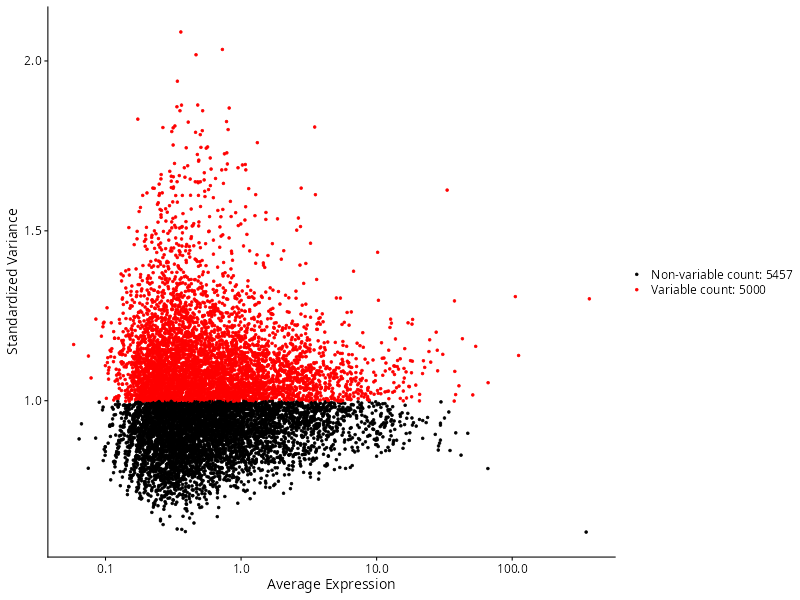

In [9]:

# Normalize and identify variable features
#pbmc_erna <- NormalizeData(pbmc_erna, normalization.method = "LogNormalize", scale.factor = 1e6)
pbmc_erna <- FindVariableFeatures(pbmc_erna, selection.method = "vst", nfeatures = 5000)

# Visualize variable features
top10 <- head(VariableFeatures(pbmc_erna), 10)
top10
VariableFeaturePlot(pbmc_erna)

Centering and scaling data matrix


  |======================================================================================| 100%


PC_ 1 
Positive:  FANTOM5-15:45004703-45005017, FANTOM5-7:105922869-105923204, FANTOM5-5:172193800-172194232, FANTOM5-6:14121845-14123283, FANTOM5-10:70849672-70851282, FANTOM5-15:51912435-51913121, FANTOM5-14:75750758-75751180, FANTOM5-6:32555783-32556185, FANTOM5-19:47814150-47814595, FANTOM5-1:28269913-28270209 
	   FANTOM5-17:81038687-81040054, FANTOM5-2:208395422-208395980, FANTOM5-8:90787257-90787620, FANTOM5-19:45980345-45980732, FANTOM5-15:51868984-51870333, FANTOM5-X:23799321-23799855, FANTOM5-1:116918925-116919548, FANTOM5-1:247524183-247524555, FANTOM5-4:17581888-17582305, FANTOM5-17:27619094-27619880 
	   FANTOM5-13:41591294-41591779, FANTOM5-19:2094360-2094773, FANTOM5-1:28199684-28200598, FANTOM5-19:47818553-47819137, FANTOM5-1:31216468-31217229, FANTOM5-18:74841905-74842663, FANTOM5-12:89554110-89556960, FANTOM5-8:56903187-56904166, FANTOM5-13:99933141-99933542, FANTOM5-17:8857526-8857964 
Negative:  FANTOM5-12:9912135-9912729, FANTOM5-14:99726837-99727734, FANTOM5-4:109

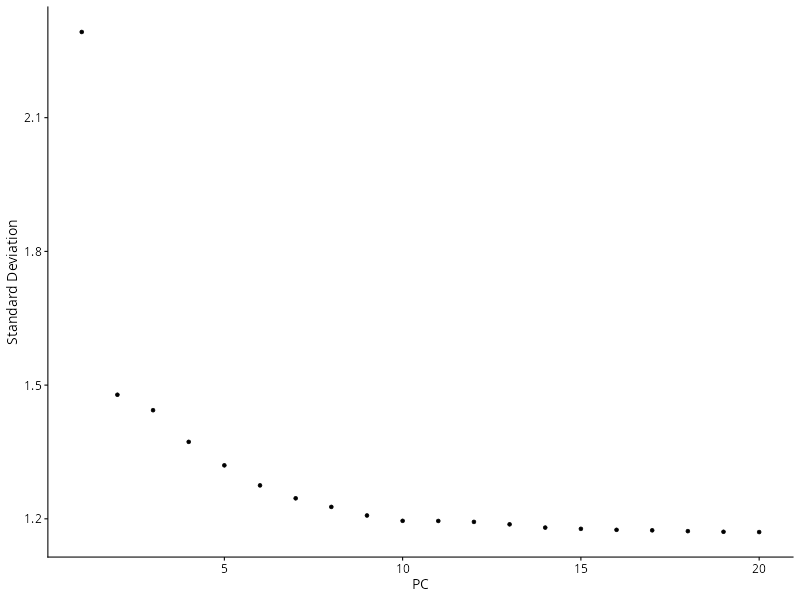

In [10]:
# Scale, PCA
pbmc_erna <- ScaleData(pbmc_erna, features = VariableFeatures(pbmc_erna))
pbmc_erna <- RunPCA(pbmc_erna, features = VariableFeatures(object = pbmc_erna))
ElbowPlot(pbmc_erna)



In [11]:
# Neighborhood graph, clustering and UMAP
pbmc_erna <- FindNeighbors(pbmc_erna, dims = 1:10)
pbmc_erna <- FindClusters(pbmc_erna, resolution = 0.2)



Computing nearest neighbor graph
Computing SNN
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10513
Number of edges: 318997

Running Louvain algorithm...


0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


Maximum modularity in 10 random starts: 0.8965
Number of communities: 5
Elapsed time: 4 seconds


In [12]:
pbmc_erna <- RunUMAP(pbmc_erna, dims = 1:10)

To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session


15:55:30 UMAP embedding parameters a = 0.9922 b = 1.112
15:55:30 Read 10513 rows and found 10 numeric columns
15:55:30 Using Annoy for neighbor search, n_neighbors = 30
15:55:30 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
15:55:32 Writing NN index file to temp file /tmp/RtmpN7MhWZ/file3cb9fe6dec188e
15:55:32 Searching Annoy index using 1 thread, search_k = 3000
15:55:42 Annoy recall = 100%
15:55:43 Commencing smooth kNN distance calibration using 1 thread with target n_neighbors = 30
15:55:45 Initializing from normalized Laplacian + noise (using irlba)
15:55:45 Commencing optimization for 200 epochs, with 427122 positive edges
15:55:45 Using rng type: pcg


Using method 'umap'
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


15:55:55 Optimization finished


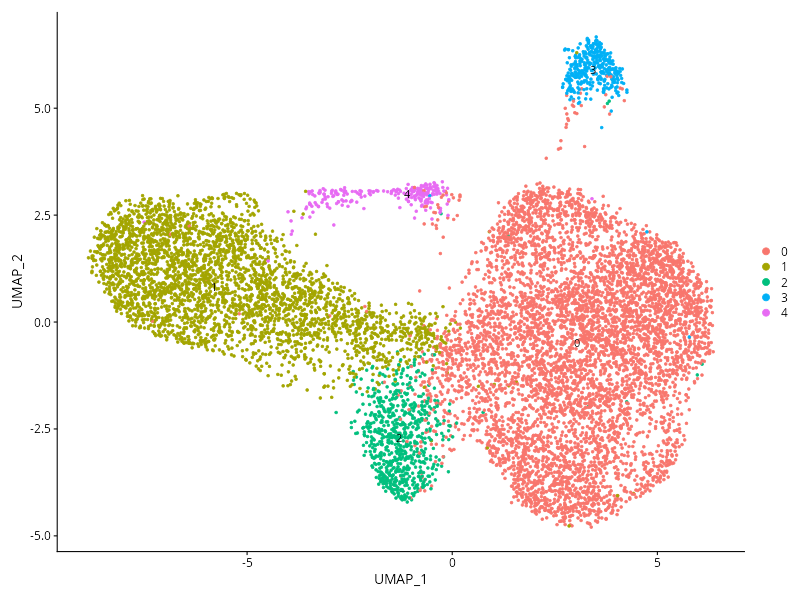

In [73]:
# Plot UMAP
DimPlot(pbmc_erna, reduction = "umap", label = TRUE,pt.size = 1) 

In [15]:
cell_type_idents = readRDS(cell_idents_path)
rownames(cell_type_idents) = gsub("-1","",rownames(cell_type_idents))
head(cell_type_idents)

                 pbmc@active.ident
AAACAGCCAATCCCTT               cd4
AAACAGCCAATGCGCT               cd8
AAACAGCCACACTAAT               cd8
AAACAGCCACCAACCG               cd8
AAACAGCCAGGATAAC               cd4
AAACAGCCAGTTTACG               cd4

In [ ]:
unique(cell_type_idents[1])

: [1m[33mError[39m in `cell_type_idents$pbmc@active.ident`:[22m
[33m![39m no applicable method for `@` applied to an object of class "factor"

In [16]:
pbmc_erna  = AddMetaData(object = pbmc_erna, metadata = cell_type_idents,col.name = "cell_type")

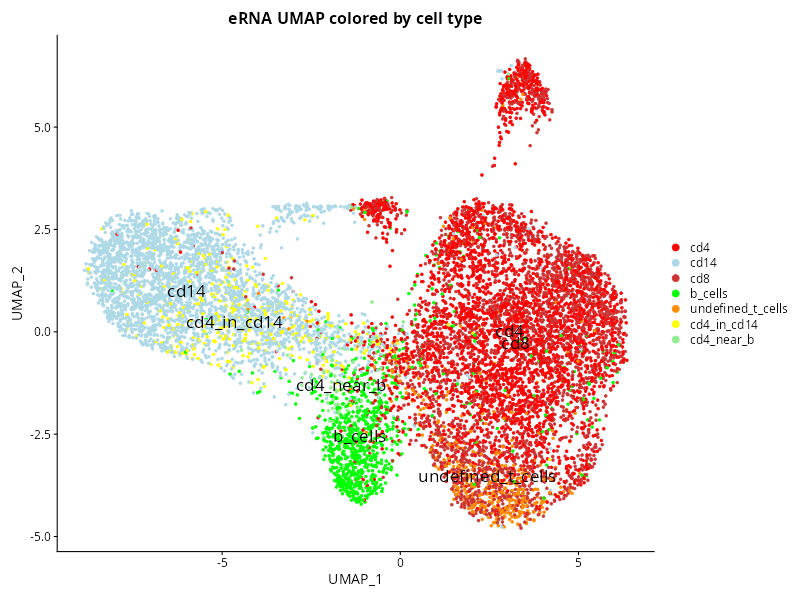

In [72]:
DimPlot(pbmc_erna, reduction = "umap", group.by = "cell_type", label = TRUE,pt.size = 1,label.size = 6)+ 
  ggtitle("eRNA UMAP colored by cell type")+
  #set colors
  scale_color_manual(values =c(
    "cd4" = "red",
    "cd8" = "brown3",
    "undefined_t_cells" = "darkorange",
    "cd4_in_cd14" = "yellow",
    "cd4_near_b" = "lightgreen",
    "b_cells" = "green",
    "cd14" = "lightblue",
    "other" = "gray"  # Add other cell types here if needed
))


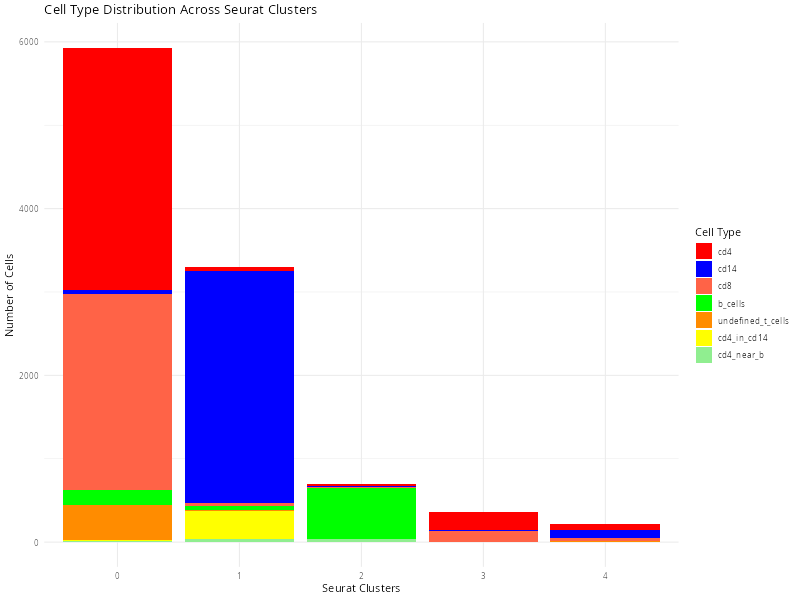

In [18]:
#stacked barplot of cell types per cluster
cluster_celltype_table = table(pbmc_erna$seurat_clusters, pbmc_erna$cell_type)
cluster_celltype_df = as.data.frame(cluster_celltype_table)

ggplot(cluster_celltype_df, aes(x=Var1, y=Freq, fill=Var2)) +
    geom_bar(stat="identity") +
    labs(x="Seurat Clusters", y="Number of Cells", fill="Cell Type") +
    ggtitle("Cell Type Distribution Across Seurat Clusters") +
    theme_minimal()+
    scale_fill_manual(values = c(
    "cd4" = "red",
    "cd8" = "tomato1",
    "undefined_t_cells" = "darkorange",
    "cd4_in_cd14" = "yellow",
    "cd4_near_b" = "lightgreen",
    "b_cells" = "green",
    "cd14" = "blue",
    "other" = "gray"  # Add other cell types here if needed
))

In [29]:
cluster_0_vs_cluster1_markers = FindMarkers(pbmc_erna, ident.1 = 0, ident.2 = 1, min.pct = 0)


For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=05m 16s


In [30]:
dim(cluster_0_vs_cluster1_markers)
head(cluster_0_vs_cluster1_markers,20)

                                       p_val avg_log2FC pct.1 pct.2     p_val_adj
FANTOM5-18:2848392-2848824      0.000000e+00       -Inf 0.003 0.311  0.000000e+00
FANTOM5-7:105922869-105923204   0.000000e+00       -Inf 0.016 0.377  0.000000e+00
FANTOM5-15:51912435-51913121   1.323228e-277       -Inf 0.001 0.203 1.383699e-273
FANTOM5-6:32555783-32556185    9.778985e-260       -Inf 0.004 0.201 1.022588e-255
FANTOM5-19:47814150-47814595   1.692542e-229       -Inf 0.001 0.170 1.769891e-225
FANTOM5-1:28269913-28270209    2.968182e-197       -Inf 0.004 0.156 3.103827e-193
FANTOM5-8:90787257-90787620    3.063678e-195       -Inf 0.006 0.163 3.203688e-191
FANTOM5-8:56887750-56888682    2.377434e-186       -Inf 0.007 0.158 2.486083e-182
FANTOM5-9:226208-226591        2.235193e-166       -Inf 0.005 0.138 2.337342e-162
FANTOM5-11:59941256-59941428   4.973019e-166       -Inf 0.002 0.127 5.200286e-162
FANTOM5-10:129851192-129851341 1.067267e-163       -Inf 0.006 0.141 1.116041e-159
FANTOM5-8:377391

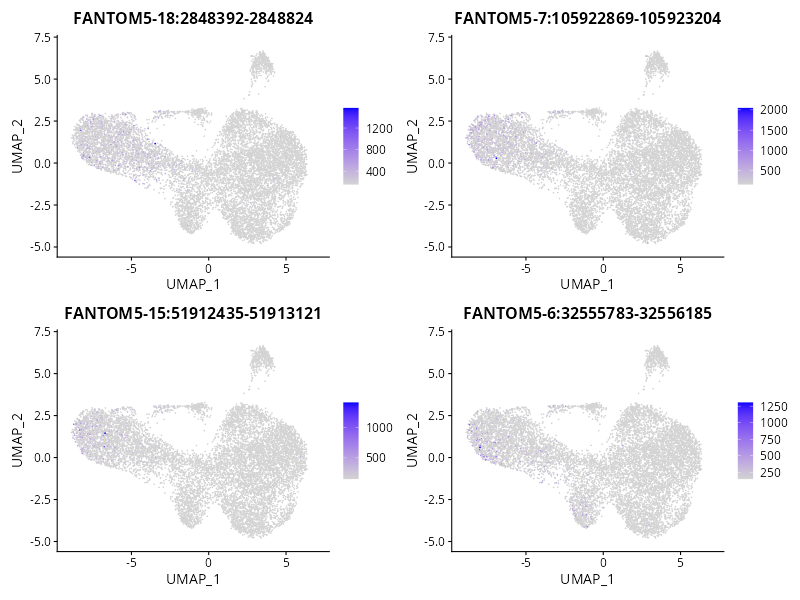

In [36]:
FeaturePlot(pbmc_erna, features = rownames(cluster_0_vs_cluster1_markers)[1:4], min.cutoff = "q9")

In [32]:
top_de_enhancers = rownames(head(cluster_0_vs_cluster1_markers,20)) %>% gsub("-","_",.)
top_de_enhancers

 [1] "FANTOM5_18:2848392_2848824"     "FANTOM5_7:105922869_105923204" 
 [3] "FANTOM5_15:51912435_51913121"   "FANTOM5_6:32555783_32556185"   
 [5] "FANTOM5_19:47814150_47814595"   "FANTOM5_1:28269913_28270209"   
 [7] "FANTOM5_8:90787257_90787620"    "FANTOM5_8:56887750_56888682"   
 [9] "FANTOM5_9:226208_226591"        "FANTOM5_11:59941256_59941428"  
[11] "FANTOM5_10:129851192_129851341" "FANTOM5_8:37739186_37739703"   
[13] "FANTOM5_2:16837187_16837623"    "FANTOM5_8:56796346_56796794"   
[15] "FANTOM5_6:144473249_144474108"  "FANTOM5_15:51868984_51870333"  
[17] "FANTOM5_8:37749222_37749683"    "FANTOM5_12:10272963_10273373"  
[19] "FANTOM5_12:10281058_10281708"   "FANTOM5_14:99726837_99727734"  

In [34]:
enhancers_metadata <- data.table::fread(enhancers_metadata_path, header = T, sep = "\t", data.table = FALSE)

In [35]:
enhancers_metadata

    chr   start     end                        id type gene_intersection bp_to_closest_gene
1     1  905373  905830   FANTOM5_1:840753-841210    1        intergenic              18093
2     1  910105  910298   FANTOM5_1:845485-845678    1        intergenic              13625
3     1  921159  921377   FANTOM5_1:856539-856757    1        intergenic               2546
4     1  922876  923268   FANTOM5_1:858256-858648    1        intergenic                655
5     1  933185  933304   FANTOM5_1:868565-868684    1          intronic                  0
6     1  983069  983175   FANTOM5_1:918449-918555    1        intergenic                953
7     1 1001272 1001758   FANTOM5_1:936652-937138    1          intronic                  0
8     1 1006411 1006755   FANTOM5_1:941791-942135    1          intronic                  0
9     1 1010389 1010654   FANTOM5_1:945769-946034    1          intronic                  0
10    1 1021183 1021432   FANTOM5_1:956563-956812    1          intronic        

In [ ]:
# deg = cluster_0_vs_cluster1_markers %>% filter(p_val_adj < 0.05 & abs(avg_log2FC) > 2)
# enhancers_metadata$id = gsub("_","-",enhancers_metadata$id)
# rownames(enhancers_metadata) = enhancers_metadata$id
# #barplot how many are intergenic or intragenic
# deg_metadata = enhancers_metadata[match(rownames(deg), enhancers_metadata$id), ]
# table(deg_metadata$gene_intersection )


intergenic   intronic 
       240       1514 